In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
ath_data = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

In [ ]:
ath_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
ath_data.shape

(41318, 15)

In [ ]:
noc.shape

(230, 3)

### To check data type

In [ ]:
ath_data.dtypes #here object is for text/string columns

ID          int64
Name       object
Sex        object
Age       float64
Height     object
Weight    float64
Team       object
NOC        object
Games      object
Year      float64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

### Descriptive stats
* describe()

In [ ]:
ath_data.describe()

,ID,Age,Weight,Year
count,41318.000000,39816.000000,31515.000000,41317.000000
mean,10813.488649,25.505651,70.785023,1978.645691
std,6048.087706,6.333934,14.272832,29.590765
min,1.000000,12.000000,25.000000,1896.000000
25%,5657.250000,21.000000,61.000000,1960.000000
50%,10906.000000,24.000000,70.000000,1988.000000
75%,15957.000000,28.000000,79.000000,2002.000000
max,21310.000000,84.000000,214.000000,2016.000000


In [ ]:
#### Two inferences
# Std for age seems very high for the range given
#   -- Look for right trend why it is ?
# min and max of age seems unreal
# potential outlier treatment ?
# Min Weight looks unreal

In [ ]:
merged = pd.merge(ath_data, noc, on = 'NOC', how = 'left')
merged.shape

(41318, 17)

In [ ]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## Analysis
* 1. Distribution of age with gold medals

In [ ]:
merged['Medal'].value_counts()

Gold      1908
Silver    1876
Bronze    1814
Name: Medal, dtype: int64

In [ ]:
golddf = merged[merged['Medal'] == 'Gold']

In [ ]:
golddf.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176,85.0,Norway,NOR,1992 Winter,1992.0,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [ ]:
### missing value check on gold data
golddf.isnull().sum()

ID           0
Name         0
Sex          0
Age         16
Height     439
Weight     488
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
region       0
notes     1880
dtype: int64

In [ ]:
golddf = golddf[np.isfinite(golddf['Age'])]

In [ ]:
golddf.isnull().sum()

ID           0
Name         0
Sex          0
Age          0
Height     425
Weight     473
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
region       0
notes     1864
dtype: int64

Text(0.5, 1.0, 'Age Distribution on Gold medal')

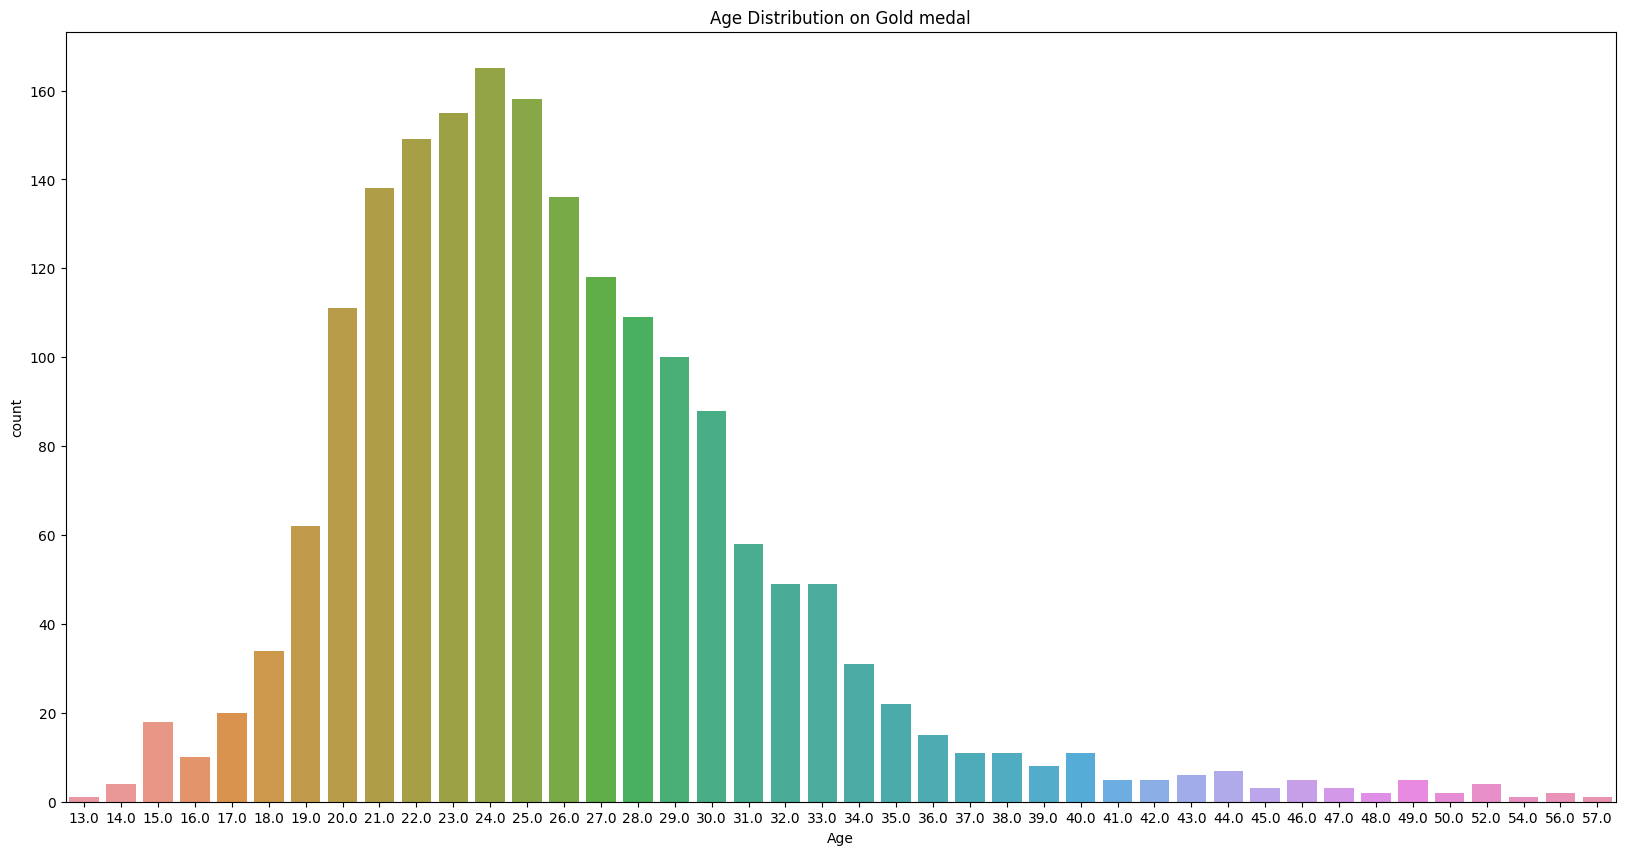

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### plot the distribution
plt.figure(figsize = (20,10))
plt.tight_layout()
#sns.countplot(x='Age',data=golddf)
sns.countplot(x=golddf['Age'])
plt.title('Age Distribution on Gold medal')

<Axes: xlabel='Sport', ylabel='count'>

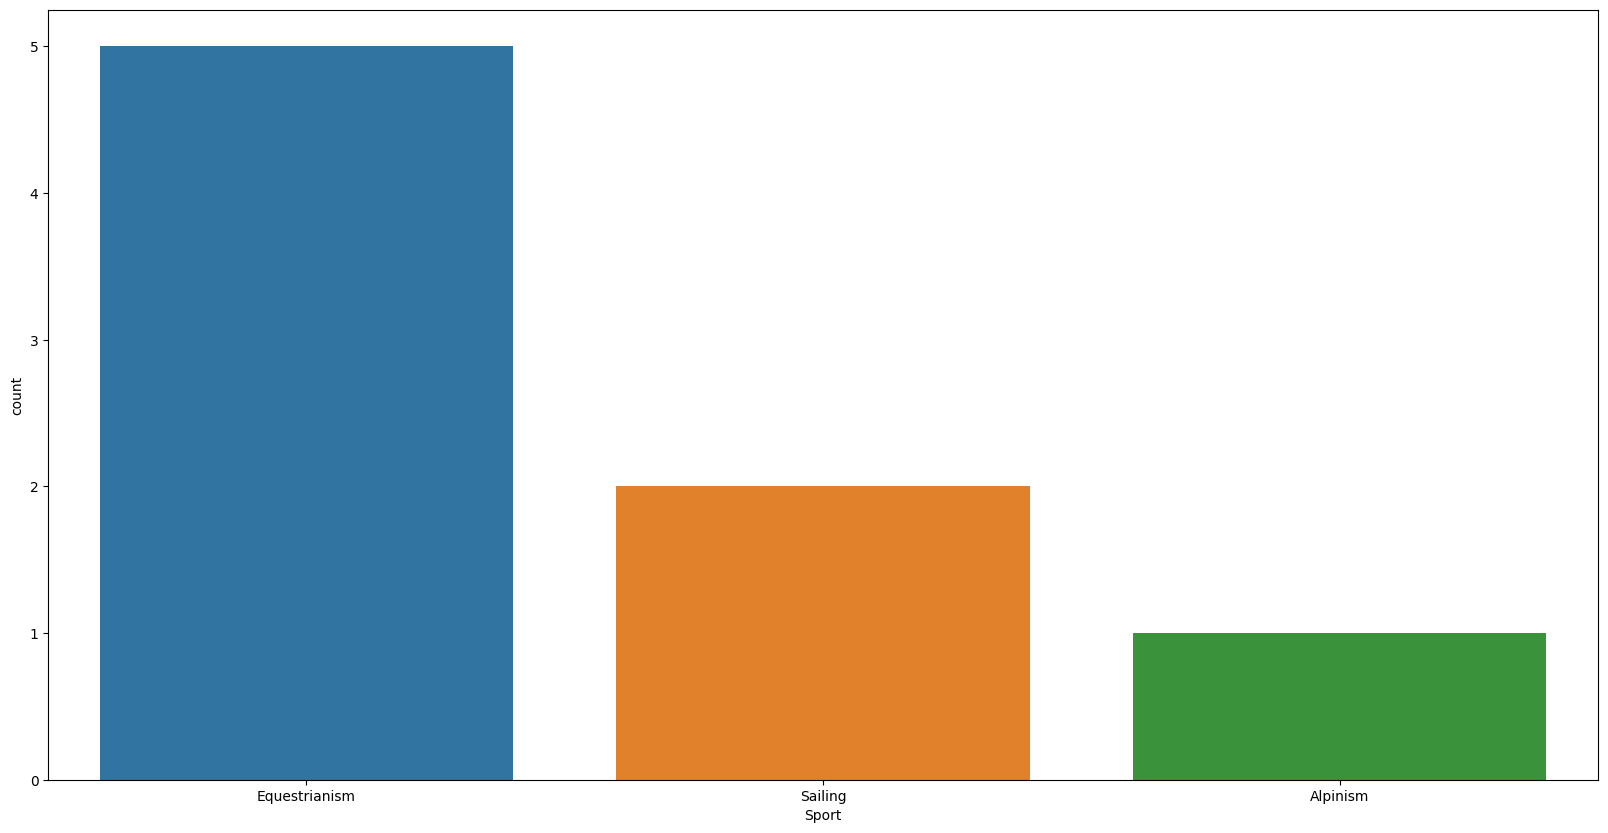

In [ ]:
plt.figure(figsize = (20,10))
plt.tight_layout()
sns.countplot(x=golddf[golddf['Age'] > 50]['Sport'])

In [ ]:
merged.head()

* Which gender has more medals/gold medal
* Which team has more gold medal - Team gold medal distribution
* Teams according to game & weight.
* Age and game analysis
* Which sport brings more gold medals
* Ideal height, weight for gold medal -- Ideal BMI ?
* City with medals ?
* Temperature analysis with medals ?? --
* Age group and inclination towards sports
* Sex & Age distribution
* Year wise analysis of countries.
* Number of place countries went with number of medals
* Player who won more gold medals.


In [ ]:
# Outliers on my numeric data
-- IQR method - remove outliers.
-- Split the data and do separate analysis
-- percentile capping (95th / 99th percentile & 5th or 1th percentile)

In [ ]:
golddf['Age']

3         34.0
42        28.0
44        28.0
48        28.0
60        20.0
          ... 
270981    23.0
271009    28.0
271016    29.0
271049    31.0
271076    21.0
Name: Age, Length: 13224, dtype: float64